<a href="https://colab.research.google.com/github/JakeOh/202011_itw_bd21/blob/main/lab_da/da09_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# mpg 데이터 셋

*   seaborn 패키지의 mpg 예제 데이터 셋을 데이터 프레임으로 로드

In [2]:
mpg = sns.load_dataset('mpg')
mpg.head()
# mpg.iloc[:5]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [3]:
mpg.tail()
# mpg.iloc[-5:]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10


*   mpg 데이터 프레임 구조 확인: 모양, 컬럼 이름, (숫자 타입 변수들) 기술 통계량, (카테고리 타입 변수들) 빈도수

In [4]:
mpg.shape

(398, 9)

In [5]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [6]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
mpg['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [8]:
mpg['name'].value_counts()

ford pinto                   6
ford maverick                5
amc matador                  5
toyota corolla               5
peugeot 504                  4
                            ..
oldsmobile omega brougham    1
honda civic 1500 gl          1
mazda rx-7 gs                1
volvo 144ea                  1
volkswagen type 3            1
Name: name, Length: 305, dtype: int64

*   두 변수 간의 상관 관계: scatter plot
    * mpg(연비) ~ displacement(배기량)
    * 2x2 suplot들을 생성: mpg ~ cylinders(실린더 개수), mpg ~ horsepower(마력), mpg ~ weight(자동차 무게), mpg ~ acceleration(가속도)

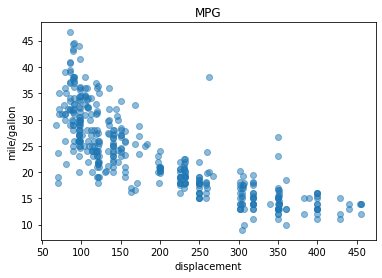

In [13]:
# plt.scatter(x=mpg['displacement'], y=mpg['mpg'])
plt.scatter(data=mpg, x='displacement', y='mpg', alpha=0.5)

plt.xlabel('displacement')
plt.ylabel('mile/gallon')
plt.title('MPG')

plt.show()

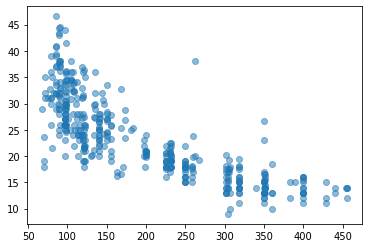

In [20]:
# plt.plot(mpg['displacement'], mpg['mpg'], 'o')
plt.plot('displacement', 'mpg', data=mpg, marker='o', linestyle='', alpha=0.5)

plt.show()

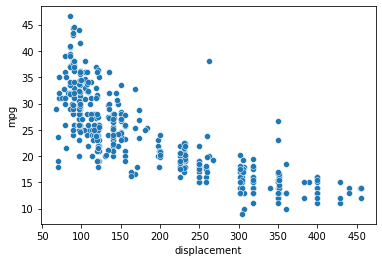

In [23]:
sns.scatterplot(data=mpg, x='displacement', y='mpg')
# plt.ylabel('mile/gallon')
plt.show()

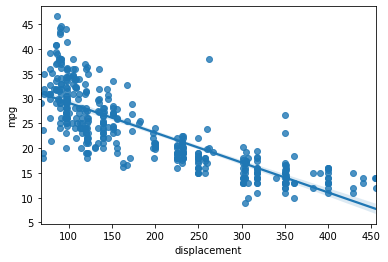

In [24]:
sns.regplot(data=mpg, x='displacement', y='mpg')
plt.show()

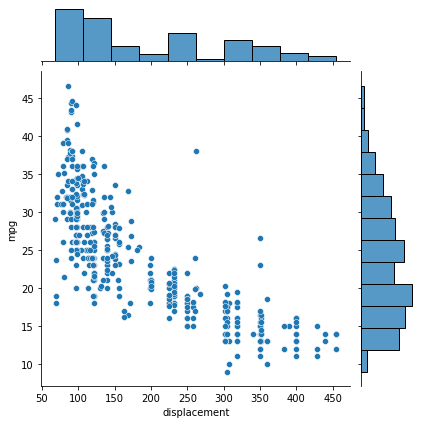

In [25]:
sns.jointplot(data=mpg, x='displacement', y='mpg')
plt.show()

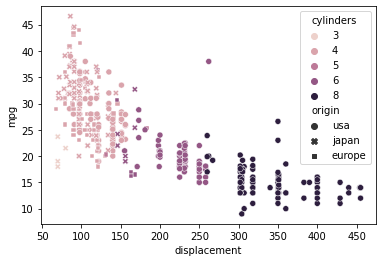

In [29]:
sns.scatterplot(data=mpg, x='displacement', y='mpg', 
                hue='cylinders', style='origin')
plt.show()

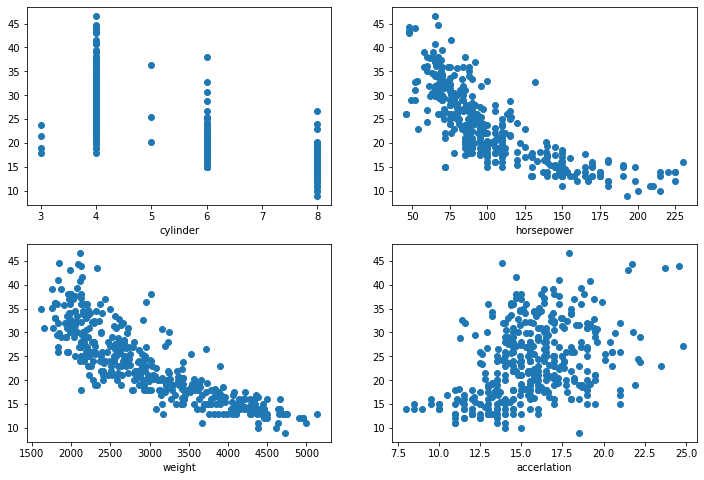

In [49]:
fig = plt.figure(figsize=(12, 8))
# ax1 = fig.add_subplot(2, 2, 1)
# ax2 = fig.add_subplot(2, 2, 2)
# ax3 = fig.add_subplot(2, 2, 3)
# ax4 = fig.add_subplot(2, 2, 4)
axes = [fig.add_subplot(2, 2, i) for i in range(1, 5)]

axes[0].scatter(data=mpg, x='cylinders', y='mpg')
axes[0].set_xlabel('cylinder')

axes[1].scatter(data=mpg, x='horsepower', y='mpg')
axes[1].set_xlabel('horsepower')

axes[2].scatter(data=mpg, x='weight', y='mpg')
axes[2].set_xlabel('weight')

axes[3].scatter(data=mpg, x='acceleration', y='mpg')
axes[3].set_xlabel('accerlation')

plt.show()

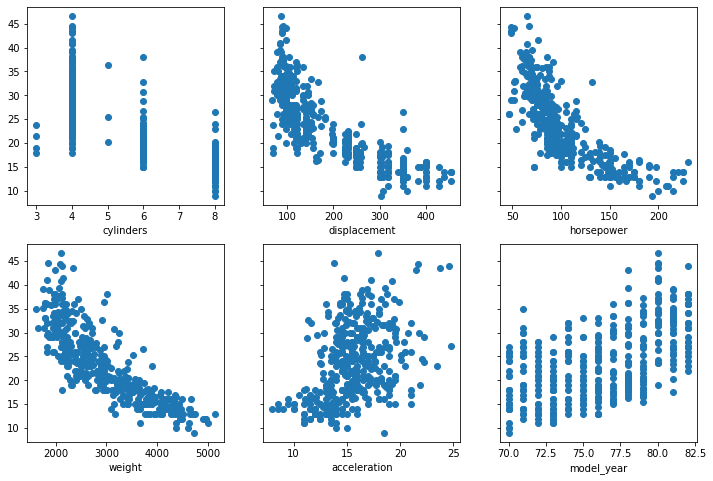

In [60]:
fig, axes = plt.subplots(nrows=2, ncols=3, sharey=True, figsize=(12, 8))

for row in range(0, 2):
    for col in range(0, 3):
        x_name = mpg.columns[row * 3 + col + 1]  # FIXME
        axes[row, col].scatter(data=mpg, x=x_name, y='mpg')
        axes[row, col].set_xlabel(x_name)

plt.show()

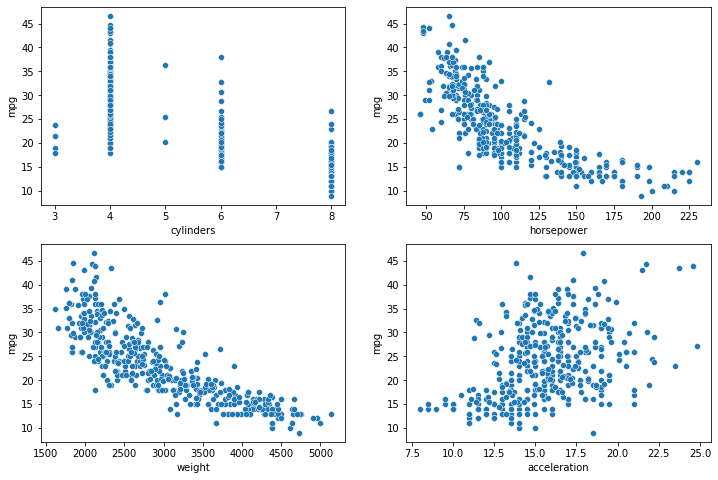

In [66]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

sns.scatterplot(data=mpg, x='cylinders', y='mpg', ax=axes[0, 0])
sns.scatterplot(data=mpg, x='horsepower', y='mpg', ax=axes[0, 1])
sns.scatterplot(data=mpg, x='weight', y='mpg', ax=axes[1, 0])
sns.scatterplot(data=mpg, x='acceleration', y='mpg', ax=axes[1, 1])

plt.show()

*   cylinder별 mpg 평균 막대 그래프

In [67]:
mpg['cylinders'].unique()

array([8, 4, 6, 3, 5])

In [69]:
mpg_by_cyl = []
for cyl in mpg['cylinders'].unique():
    mpg_mean = mpg[mpg['cylinders'] == cyl]['mpg'].mean()
    # print(f'cylinder: {cyl}, mpg mean: {mpg_mean}')
    mpg_by_cyl.append(mpg_mean)

print(mpg_by_cyl)

[14.963106796116508, 29.28676470588236, 19.985714285714284, 20.55, 27.366666666666664]


In [70]:
s = pd.Series(data=mpg_by_cyl, index=mpg['cylinders'].unique())
s

8    14.963107
4    29.286765
6    19.985714
3    20.550000
5    27.366667
dtype: float64

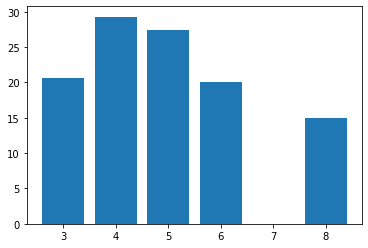

In [71]:
plt.bar(x=s.index, height=s.values)
plt.show()

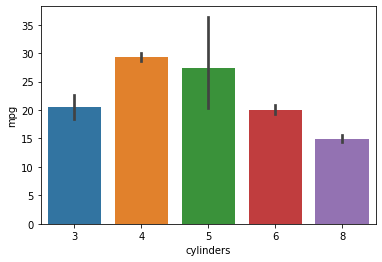

In [72]:
sns.barplot(data=mpg, x='cylinders', y='mpg')
plt.show()

*   cylinder별 mpg의 boxplot

*   origin별, cylinder별 mpg의 boxplot
    *   origin별로 subplot을 생성

*   origin별, cylinder별 mpg의 평균 막대 그래프
    *   origin별로 subplot을 생성

# iris 데이터 셋

*   seaborn 패키지의 iris 예제 데이터 셋을 데이터 프레임으로 로드

* iris 데이터 프레임의 구조 파악: shape, columns, head, tail, describe, value_counts

*   품종(species)을 제외한 4개 변수의 boxplot

*   품종별로 suplot의 컬럼을 구분, 데이터 프레임의 나머지 4개 변수의 box plot을 품종별로.

*   petal_length ~ petal_width scatter plot
    *   품종별로 마커의 색깔이 다르게

*   sepal_length ~ sepal_width scatter plot
    *   품종별로 마커의 색깔이 다르게